# <center><font color = "Purple"> Titanic Survival Prediction </font></center>

## <font color = "blue">Importing libraries📚</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

## <font color = 'black'> Loading Datasets </font>


In [2]:
tacos, nachos = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv'),pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/test.csv')

## <font color = 'purple'> Analyzing and exploring the data🔎</font>

<span style="font-family:cursive;"> I might have been hungry during the making of this notebook 🌮</span>

In [3]:
tacos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
nachos.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Basic information about the data

<div>
<b>PassengerID:</b> uniqe id of each passenger, Survived: the life or death of a passenger (0 or 1) 1= Survived, 0 = Not Survived
<br>
    <b>Pclass:</b> (passenger class) is the scoioeconomic status of the passengers: 1 = Upper Class, 2 = Middle Class, 3 = Lower Class</br>
<b>Embarked:</b> port of entry with 3 unique values (C,Q, or S) C= Cherbourg, Q= Queenstown, S= Southampton<div>

In [5]:
tacos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
nachos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
taco = tacos.shape
nacho = nachos.shape
print(taco)
print(nacho)

(891, 12)
(418, 11)


In [8]:
tacos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
nachos.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
tacos[tacos['Sex']=='female']['Survived'].sum()

233

In [11]:
tacos[tacos['Sex']=='male']['Survived'].sum()

109

Checking which would be best to use when I use "fillna".

In [12]:
tacos['Age'].median(), tacos['Age'].mean()

(28.0, 29.69911764705882)

In [13]:
nachos['Age'].median(), nachos['Age'].mean()

(27.0, 30.272590361445783)

In [14]:
tacos.replace({'female':1, 'male':0}, inplace=True)
tacos.replace({'S':1, 'C':2, 'Q':3}, inplace=True)
tacos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [15]:
nachos.replace({'female':1, 'male':0}, inplace=True)
nachos.replace({'S':1, 'C':2, 'Q':3}, inplace=True)
nachos.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,1


In [16]:
tacos['Age'].fillna(tacos['Age'].mean(), inplace = True)
tacos['Embarked'].fillna(tacos['Embarked'].mean(), inplace=True)
tacos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [17]:
nachos['Age'].fillna(nachos['Age'].mean(), inplace = True)
nachos['Fare'].fillna(nachos['Fare'].mean(), inplace=True)
nachos.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## <font color = 'blue'> Let's look at some visuals📊 </font>

Sex


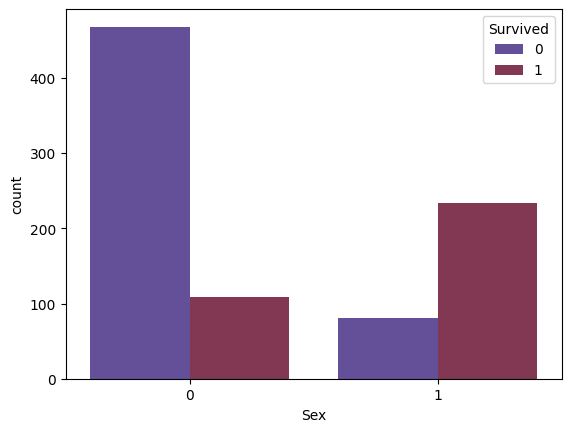


Embarked


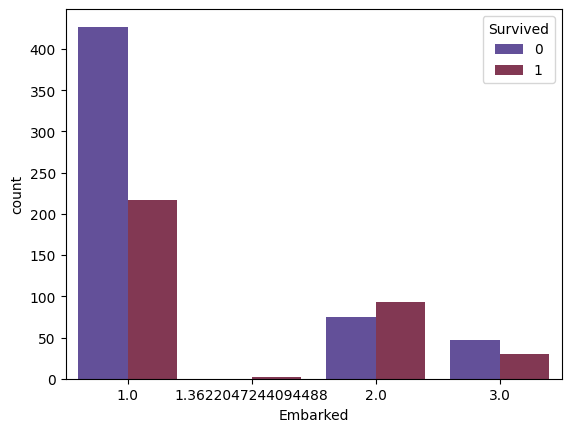


Pclass


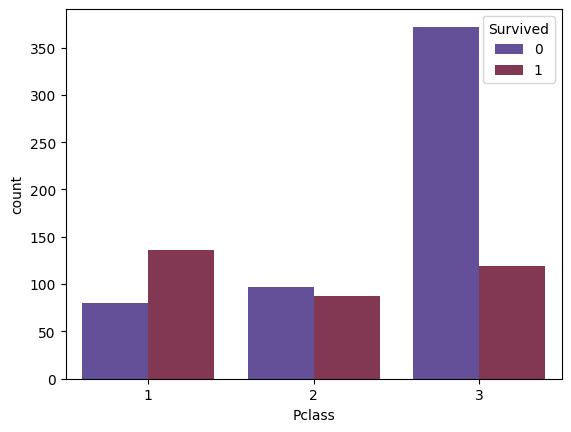


SibSp


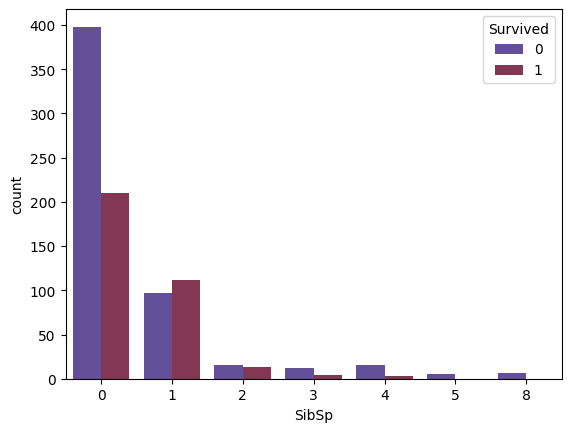


Parch


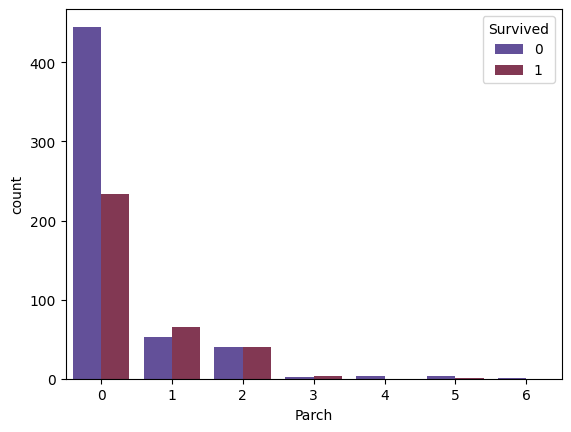

In [18]:
for column_name in ['Sex','Embarked','Pclass', 'SibSp', 'Parch']:
    print(column_name)
    sns.countplot(data=tacos, x=column_name, hue='Survived', palette='twilight')
    plt.show()
    print("")

<Axes: xlabel='Age', ylabel='Count'>

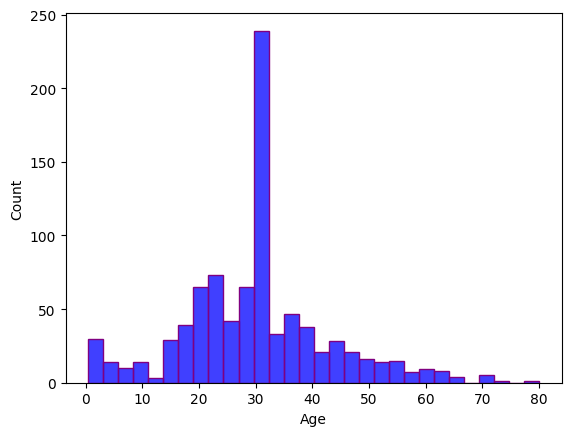

In [19]:
sns.histplot(tacos['Age'], color = 'blue', edgecolor = 'purple')

<Axes: xlabel='Survived'>

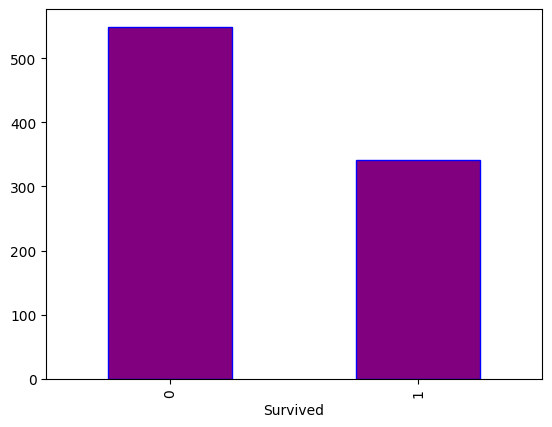

In [20]:
tacos.Survived.value_counts().plot.bar(color = 'purple', edgecolor = 'blue')

In [21]:
celine = tacos.drop(columns = ['PassengerId', 'Name', 'Cabin', 'Ticket', 'SibSp', 'Parch'])
celine.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,1.0
1,1,1,1,38.0,71.2833,2.0
2,1,3,1,26.0,7.9250,1.0
3,1,1,1,35.0,53.1000,1.0
4,0,3,0,35.0,8.0500,1.0


In [22]:
iceburg = celine.corr()

<Axes: >

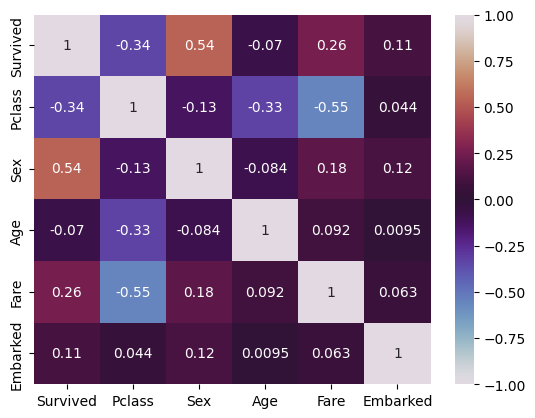

In [23]:
sns.heatmap((iceburg), vmin=-1, vmax=1, cmap='twilight', annot=True)

In [24]:
taco_pivot = pd.pivot_table(tacos, index = 'Survived', values = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'])
taco_pivot

,Age,Embarked,Fare,Pclass,Sex
Survived,,,,,
0,30.415100,1.307832,22.117887,2.531876,0.147541
1,28.549778,1.449487,48.395408,1.950292,0.681287


Besides the fact that women and children were first on the life boats, looking at the information it seems that it also depended on the class of a person that had survived, as shown below. First class people were more likely to survive than that of Second and Third class citizen. 

### <font color = 'purple'> Percentage of Different Class Survivors </font>

In [25]:
guest = tacos.loc[tacos.Pclass == 1]['Survived']
guest_1class = sum(guest)/len(guest)
print ("Percentage of 1st Class who Survived:", guest_1class)

Percentage of 1st Class who Survived: 0.6296296296296297


In [26]:
guest2 = tacos.loc[tacos.Pclass == 2]['Survived']
guest_2class = sum(guest2)/len(guest2)
print ("Percentage of 2nd Class who Survived:", guest_2class)

Percentage of 2nd Class who Survived: 0.47282608695652173


In [27]:
guest3 = tacos.loc[tacos.Pclass == 3]['Survived']
guest_3class = sum(guest3)/len(guest3)
print ("Percentage of 3rd Class who Survived:", guest_3class)

Percentage of 3rd Class who Survived: 0.24236252545824846


## <font color= 'blue'> The Prediction Model🔮</font>

In [28]:
from sklearn.ensemble import RandomForestClassifier

y = tacos["Survived"]

features = ["Pclass", "Sex", "Age", "Embarked"]
X = pd.get_dummies(tacos[features])
X_test = pd.get_dummies(nachos[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': nachos.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print('Submission Sucessful!!!'), output

Submission Sucessful!!!


(None,
      PassengerId  Survived
 0            892         0
 1            893         0
 2            894         0
 3            895         0
 4            896         0
 ..           ...       ...
 413         1305         0
 414         1306         1
 415         1307         0
 416         1308         0
 417         1309         0
 
 [418 rows x 2 columns])